# WeatherPy

This WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and weather.
* In plotting latitude vs temperature, the temperatures increased as the cities neared zero latitude, that is the equator. 
* The latitude vs humidity scatter plot has a concentration of cities with high humidity at latitudes between 50 and 80.
* Looking at latitude vs wind speed, there is a higher concentration of wind speeds up to 10 mph in cities between 30 and 70 degrees latitude.
* Temperatures in the Norhtern hemisphere show a moderate positive correlation to latitude while the Southern hemisphere shows a strong positive correlation. In both hemispheres, there is almost no latitude correlation to weather patterns in humidity, cloudiness, and wind speed. Based on this analysis, temperature is primarily effected by latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
import datetime as dt

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Get today's date to add to plot titles
date = dt.datetime.now()
date = date.strftime("%m/%d/%Y")

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls

In [51]:
# Base URL from the OpenWeatherMap API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create the query URL
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

#Create lists to store the data
city_name= []
city_id = []
country = []
date_time = []
lat = []
lon = []
temp = []
humid = []
clouds = []
wind = []

#Running a query to get the weather data for each city in the cites list
print("Beginning Data Retrieval\n----------------------")
for city in cities:
    try:
        query = query_url + city  
        city_data = requests.get(query).json()
        #Print out each city and its ID as it is being processed
        id_number = city_data['id']
        print('''Processing...City Name: {0} 
             City ID: {1}'''.format(city, id_number))    
        #Each element of data is being appended to a coorsponding list as it is processed
        city_name.append(city_data['name'])
        city_id.append(city_data['id'])
        country.append(city_data['sys']['country'])
        date_time.append(city_data['dt'])
        lat.append(city_data['coord']['lat'])
        lon.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])  
    # If the city is not found in OpenWeatherMap, skip it
    except:
        print("City not found. Skipping...")
        pass
print("----------------------\nData Retrieval Complete\n----------------------")

Beginning Data Retrieval
----------------------
Processing...City Name: veraval 
             City ID: 1253237
Processing...City Name: kaitangata 
             City ID: 2208248
Processing...City Name: bambous virieux 
             City ID: 1106677
City not found. Skipping...
City not found. Skipping...
Processing...City Name: mataura 
             City ID: 6201424
Processing...City Name: malinovoye ozero 
             City ID: 1499779
Processing...City Name: vegreville 
             City ID: 6173635
Processing...City Name: nnewi 
             City ID: 2328765
Processing...City Name: barrow 
             City ID: 5880054
Processing...City Name: hithadhoo 
             City ID: 1282256
Processing...City Name: lasa 
             City ID: 3175096
Processing...City Name: anadyr 
             City ID: 2127202
Processing...City Name: airai 
             City ID: 1651810
Processing...City Name: punta arenas 
             City ID: 3874787
Processing...City Name: tiksi 
             City ID: 201

Processing...City Name: khatanga 
             City ID: 2022572
Processing...City Name: vardo 
             City ID: 777019
Processing...City Name: watertown 
             City ID: 4954611
Processing...City Name: kushiro 
             City ID: 2129376
Processing...City Name: ixtapa 
             City ID: 4004293
Processing...City Name: ghanzi 
             City ID: 933759
Processing...City Name: vanavara 
             City ID: 2013727
Processing...City Name: astoria 
             City ID: 5711847
Processing...City Name: korla 
             City ID: 1529376
Processing...City Name: avarua 
             City ID: 4035715
Processing...City Name: ilulissat 
             City ID: 3423146
Processing...City Name: akcakoca 
             City ID: 752584
Processing...City Name: ostrovnoy 
             City ID: 556268
Processing...City Name: vestmanna 
             City ID: 2610343
Processing...City Name: clyde river 
             City ID: 5924351
Processing...City Name: zholymbet 
             Cit

Processing...City Name: olinda 
             City ID: 3393536
Processing...City Name: puerto leguizamo 
             City ID: 3671437
Processing...City Name: tura 
             City ID: 1254046
Processing...City Name: luderitz 
             City ID: 3355672
Processing...City Name: sisimiut 
             City ID: 3419842
Processing...City Name: ambatondrazaka 
             City ID: 1082639
Processing...City Name: riyadh 
             City ID: 108410
Processing...City Name: stepnyak 
             City ID: 1518768
Processing...City Name: goya 
             City ID: 3433715
Processing...City Name: bestobe 
             City ID: 1525376
Processing...City Name: mwingi 
             City ID: 184921
Processing...City Name: yima 
             City ID: 1786676
Processing...City Name: jennersdorf 
             City ID: 2775089
Processing...City Name: oparino 
             City ID: 515175
Processing...City Name: dhar 
             City ID: 1272892
City not found. Skipping...
Processing...City Name

Processing...City Name: plettenberg bay 
             City ID: 964712
Processing...City Name: zhoucun 
             City ID: 1784178
Processing...City Name: shabqadar 
             City ID: 1165744
Processing...City Name: smithers 
             City ID: 6149996
Processing...City Name: biltine 
             City ID: 244878
Processing...City Name: tilichiki 
             City ID: 2120591
City not found. Skipping...
Processing...City Name: scarborough 
             City ID: 2638419
Processing...City Name: whitehorse 
             City ID: 6180550
City not found. Skipping...
Processing...City Name: pauini 
             City ID: 3662927
Processing...City Name: zyryanovsk 
             City ID: 1516438
Processing...City Name: pontes e lacerda 
             City ID: 3453060
Processing...City Name: griffith 
             City ID: 4920986
Processing...City Name: sakakah 
             City ID: 102527
Processing...City Name: dinar 
             City ID: 316634
Processing...City Name: narsaq 
    

Processing...City Name: acari 
             City ID: 3948613
Processing...City Name: chazuta 
             City ID: 3698414
Processing...City Name: gambela 
             City ID: 337405
Processing...City Name: ugoofaaru 
             City ID: 1337619
Processing...City Name: port hardy 
             City ID: 6111862
City not found. Skipping...
Processing...City Name: madridejos 
             City ID: 2514334
Processing...City Name: saint augustine 
             City ID: 4170894
Processing...City Name: sheridan 
             City ID: 5838199
Processing...City Name: bam 
             City ID: 141736
Processing...City Name: huarmey 
             City ID: 3939168
Processing...City Name: tazovskiy 
             City ID: 1489853
Processing...City Name: pitimbu 
             City ID: 3391889
Processing...City Name: pankrushikha 
             City ID: 1495613
Processing...City Name: ozernovskiy 
             City ID: 2122293
Processing...City Name: primorsko 
             City ID: 727964
Proces

### Convert Raw Data to DataFrame

In [52]:
#Creating a dictionary of the weather stats for each city
weather_dict = {"City": city_name,
                "City ID": city_id,
                "Country": country,
                "Latitude": lat,
                "Longitude": lon,
                "Temp(F)": temp,
                "Humidity(%)": humid,
                "Cloudiness(%)": clouds,
                "Wind Speed(mph)": wind,
                "City Date/Time": date_time}

#Making a dataframe table of the dictionary data
weather_data = pd.DataFrame(weather_dict) 

#Exporting the data to a csv file without the Pandas index, but with the header
weather_data.to_csv("out_put/cities.csv", encoding="utf-8", index=False, header=True)
weather_data.head()

,City,City ID,Country,Latitude,Longitude,Temp(F),Humidity(%),Cloudiness(%),Wind Speed(mph),City Date/Time
0,Verāval,1253237,IN,20.90,70.37,83.46,82,100,6.20,1596233962
1,Kaitangata,2208248,NZ,-46.28,169.85,52.00,79,100,1.99,1596233962
2,Bambous Virieux,1106677,MU,-20.34,57.76,69.42,78,20,4.70,1596233962
3,Mataura,6201424,NZ,-46.19,168.86,51.31,83,100,3.74,1596233963
4,Malinovoye Ozero,1499779,RU,51.68,79.78,62.10,85,1,3.91,1596233963


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [53]:
#Checking the weather dataframe to make sure no cities are over 100 percent humidity.
too_humid = weather_data["Humidity(%)"] > 100
for value in too_humid:
    if value == "True":
        print("A city has over 100% humidity.")
print("All cities checked for humidity range compliance.")

All cities checked for humidity range compliance.


## Latitude vs. Temperature Plot

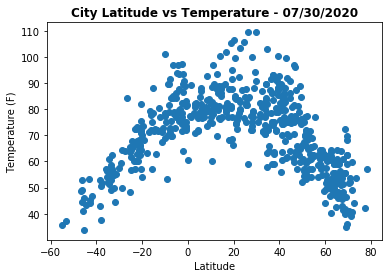

In [6]:
# Plot the latitude of the city compared to its temperature
city_lat = weather_data['Latitude']
temp = weather_data['Temp(F)']
plt.scatter(city_lat, temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'City Latitude vs Temperature - {date}', fontweight="black")
#Saving the scatter plot as a png file
plt.savefig("lat_temp.png")
plt.show()

### City Latitude vs Temperature
The WeatherPy code collects API data from a random selection of 500 or more cities around the globe. The data from those cities is plotted to determine correlations between latitude and weather. In plotting latitude vs temperature, the temperatures increased as the cities neared zero latitude, that is the equator. 


## Latitude vs. Humidity Plot

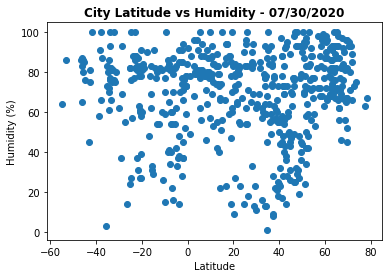

In [7]:
# Plot the latitude of the city compared to its humidity
city_lat = weather_data['Latitude']
humidity = weather_data['Humidity(%)']
plt.scatter(city_lat, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity - {date}', fontweight="black")
#Saving the scatter plot as a png file
plt.savefig("lat_humid.png")
plt.show()

### City Latitude vs Humidity
The WeatherPy code collects API data from a random selection of 500 or more cities around the globe. The data from those cities is plotted to determine correlations between latitude and weather. In plotting latitude vs humidity, there is a concentration of cities with high humidity at latitudes between 50 and 80. 


## Latitude vs. Cloudiness Plot

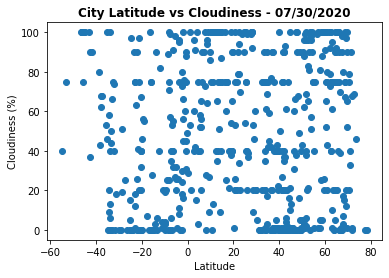

In [8]:
# Plot the latitude of the city compared to its cloudiness
city_lat = weather_data['Latitude']
clouds = weather_data['Cloudiness(%)']
plt.scatter(city_lat, clouds)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness - {date}', fontweight="black")
#Saving the scatter plot as a png file
plt.savefig("lat_clouds.png")
plt.show()

### City Latitude vs Cloudiness
The WeatherPy code collects API data from a random selection of 500 or more cities around the globe. The data from those cities is plotted to determine correlations between latitude and weather. In plotting latitude vs cloudiness, there is no apparent correlation between the density of clouds and latitude. 

## Latitude vs. Wind Speed Plot

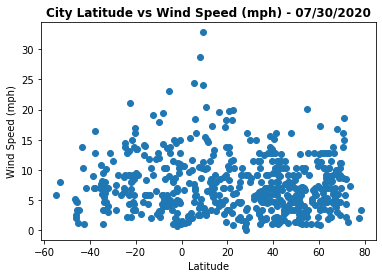

In [41]:
# Plot the latitude of the city compared to its wind speed
city_lat = weather_data['Latitude']
wind = weather_data['Wind Speed(mph)']
plt.scatter(city_lat, wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed (mph) - {date}', fontweight="black")
#Saving the scatter plot as a png file
plt.savefig("lat_wind.png")
plt.show()

### City Latitude vs Wind Speed
The WeatherPy code collects API data from a random selection of 500 or more cities around the globe. The data from those cities is plotted to determine correlations between latitude and weather. In plotting latitude vs wind speed, there is a higher concentration of wind speeds up to 10 mph in cities between 30 and 70 degrees latitude.

## Linear Regression

In [10]:
# If the city latitude is greater than zero it is in the northern hemisphere
northern_data = weather_data.loc[weather_data['Latitude'] > 0]
# If the city latitude is less than zero it is in the southern hemisphere
southern_data = weather_data.loc[weather_data['Latitude'] < 0]

In [13]:
#This function creates and plots a liner regression line and equation, and returns the r-squared value
def linear_regression(city_lat, weather):
    x_values = city_lat
    y_values = weather
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.min(),y_values.min()), fontsize=12 ,color="red")
    return print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Temp vs. Latitude Linear Regression

The r-squared is: 0.4830282075328703


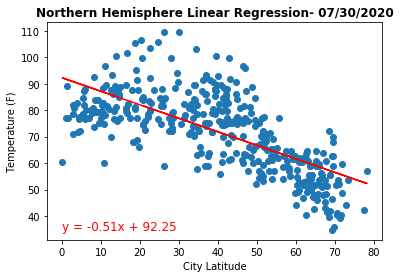

In [24]:
# Plot the latitude of the city compared to its temperature
city_lat = northern_data['Latitude']
temp = northern_data['Temp(F)']
plt.scatter(city_lat, temp)
plt.xlabel('City Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, temp)
#Saving the scatter plot as a png file
plt.savefig("northern_regress_temp.png")
plt.show()

This linear regression model for the Northern hemisphere is showing if there is any correlation between temperature and latitude. Based on the r-squared value (correlation coeficient), there is a moderate correlation between latitude and temperature. That is, temperature rises the closer we get to zero, or the equator.

####  Southern Hemisphere - Temp vs. Latitude Linear Regression

The r-squared is: 0.7305790682479749


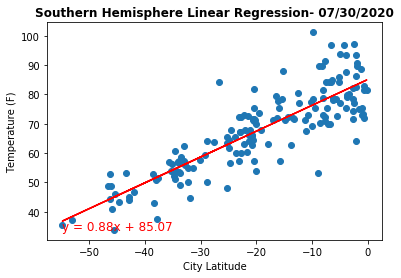

In [30]:
# Plot the latitude of the city compared to its temperature
city_lat = southern_data['Latitude']
temp = southern_data['Temp(F)']
plt.scatter(city_lat, temp)
plt.xlabel('City Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, temp)
#Saving the scatter plot as a png file
plt.savefig("southern_regress_temp.png")
plt.show()

This linear regression model for the Southern hemisphere is showing if there is any correlation between temperature and latitude. Based on the r-squared value (correlation coeficient), there is a strong correlation between latitude and temperature. That is, temperature rises the closer we get to zero, or the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004228029142896847


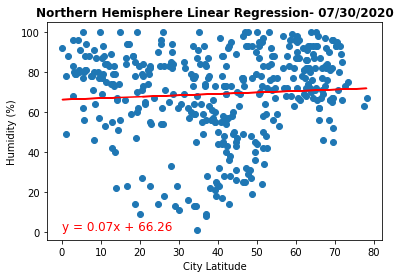

In [40]:
# Plot the latitude of the city compared to its humidity
city_lat = northern_data['Latitude']
humidity = northern_data['Humidity(%)']
plt.scatter(city_lat, humidity)
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, humidity)
#Saving the scatter plot as a png file
plt.savefig("northern_regress_humid.png")
plt.show()

This linear regression model for the Northern hemisphere is showing if there is any correlation between humidity and latitude. Based on the r-squared value (correlation coeficient), there is a almost no correlation between latitude and humidity. Comparing the correlation between latitude and temperature vs latitude and humidity, increase in temperature does not effect relative humidity. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.056369800486301545


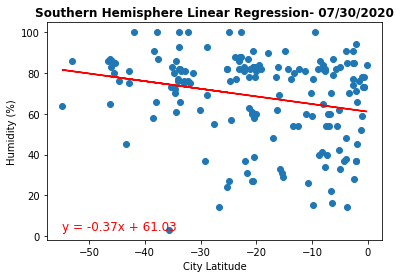

In [35]:
# Plot the latitude of the city compared to its humidity
city_lat = southern_data['Latitude']
humidity = southern_data['Humidity(%)']
plt.scatter(city_lat, humidity)
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, humidity)
#Saving the scatter plot as a png file
plt.savefig("southern_regress_humid.png")
plt.show()

This linear regression model for the Southern hemisphere is showing if there is any correlation between humidity and latitude. Based on the r-squared value (correlation coeficient), there is a very weak correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009348873373642519


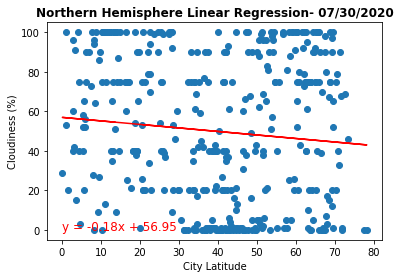

In [39]:
# Plot the latitude of the city compared to its cloudiness
city_lat = northern_data['Latitude']
clouds = northern_data['Cloudiness(%)']
plt.scatter(city_lat, clouds)
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, clouds)
#Saving the scatter plot as a png file
plt.savefig("northern_regress_clouds.png")
plt.show()

This linear regression model for the Northern hemisphere is showing if there is any correlation between cloudiness and latitude. Based on the r-squared value (correlation coeficient), there is a very weak correlation between latitude and cloudiness. No matter the latitude, most cities have either < 20% or > 70% cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.019205024737408084


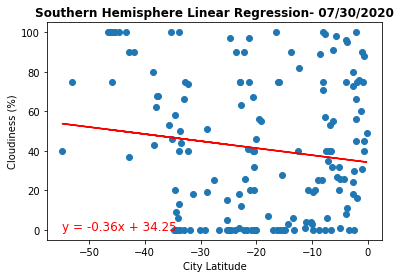

In [37]:
# Plot the latitude of the city compared to its cloudiness
city_lat = southern_data['Latitude']
clouds = southern_data['Cloudiness(%)']
plt.scatter(city_lat, clouds)
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, clouds)
#Saving the scatter plot as a png file
plt.savefig("southern_regress_clouds.png")
plt.show()

This linear regression model for the Southern hemisphere is showing if there is any correlation between cloudiness and latitude. Based on the r-squared value (correlation coeficient), there is a very weak correlation between latitude and cloudiness. No matter the latitude, more cities have < 20% cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013063251726679413


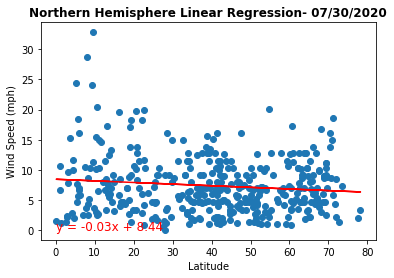

In [38]:
# Plot the latitude of the city compared to its wind speed
city_lat = northern_data['Latitude']
wind = northern_data['Wind Speed(mph)']
plt.scatter(city_lat, wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, wind)
#Saving the scatter plot as a png file
plt.savefig("northern_regress_wind.png")
plt.show()

This linear regression model for the Northern hemisphere is showing if there is any correlation between wind speed and latitude. Based on the r-squared value (correlation coeficient), there is a very weak correlation between latitude and wind speed. On this particular day, there is a concentration of cites in the Northern hemisphere with wind speeds < 15mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01279614226561866


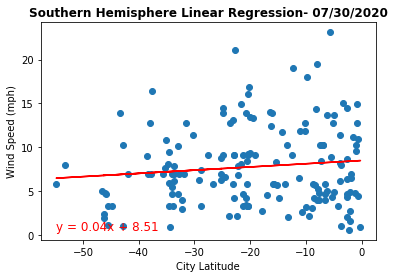

In [34]:
# Plot the latitude of the city compared to its wind speed
city_lat = southern_data['Latitude']
wind = southern_data['Wind Speed(mph)']
plt.scatter(city_lat, wind)
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, wind)
#Saving the scatter plot as a png file
plt.savefig("southern_regress_wind.png")
plt.show()

This linear regression model for the Southern hemisphere is showing if there is any correlation between wind speed and latitude. Based on the r-squared value (correlation coeficient), there is a very weak correlation between latitude and wind speed. On this particular day, there is a concentration of cites in the Southern hemisphere with wind speeds < 5mph.